<h1> Violence in Kenya</h1>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('post-election-violence-data.csv')
df.drop(0, inplace=True)

In [3]:
df['event_date'] = pd.to_datetime(df['event_date'])
df.index = df['event_date']

In [4]:
df['fatalities'] =df['fatalities'].apply(lambda num: int(num))

<h2>Fatalities caused by various Events</h2>

In [5]:
df.groupby(df['event_type'])['fatalities'].sum()

event_type
Battles                       3935
Explosions/Remote violence     738
Protests                        40
Riots                         1026
Strategic developments           0
Violence against civilians    4811
Name: fatalities, dtype: int64

Text(0, 0.5, ' ')

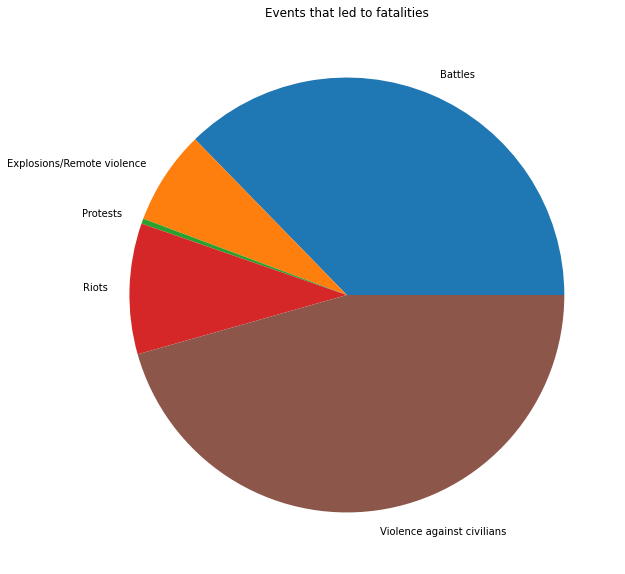

In [16]:
df.groupby(df['event_type'])['fatalities'].sum().plot(kind='pie', figsize=(14,10),)
plt.title('Events that led to fatalities')
plt.ylabel(' ')

<h2>Sub events in relation to "major" events</h2>

In [7]:
df.groupby([df['event_type'], df['sub_event_type']])['fatalities'].sum()

event_type                  sub_event_type                     
Battles                     Armed clash                            3911
                            Government regains territory              4
                            Non-state actor overtakes territory      20
Explosions/Remote violence  Air/drone strike                          0
                            Grenade                                 115
                            Remote explosive/landmine/IED           538
                            Shelling/artillery/missile attack        65
                            Suicide bomb                             20
Protests                    Excessive force against protesters       40
                            Peaceful protest                          0
                            Protest with intervention                 0
Riots                       Mob violence                            490
                            Violent demonstration                   536


<h2>How different regions were affected</h2>

In [14]:
df.groupby(df['admin1'])['fatalities'].sum().sort_values(ascending=False)[:10]

admin1
Turkana       1475
Nairobi       1128
Mandera       1086
Marsabit       638
Garissa        569
Nakuru         542
Wajir          503
Tana River     392
Lamu           348
Samburu        342
Name: fatalities, dtype: int64

Text(0.5, 0, 'Number of fatalities')

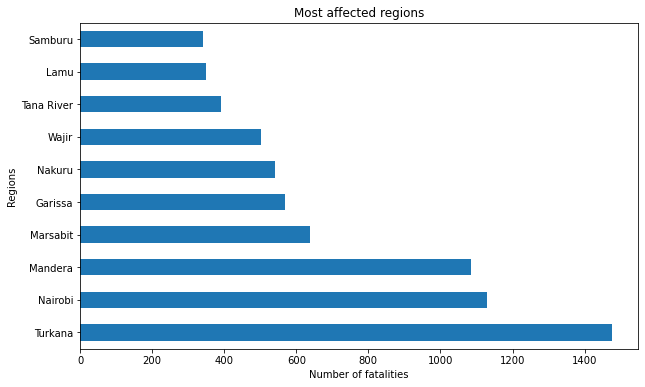

In [31]:
df.groupby(df['admin1'])['fatalities'].sum().sort_values(ascending=False)[:10].plot(kind='barh',figsize=(10,6))
plt.title('Most affected regions')
plt.ylabel('Regions')
plt.xlabel('Number of fatalities')

Text(0.5, 0, 'Number of fatalities')

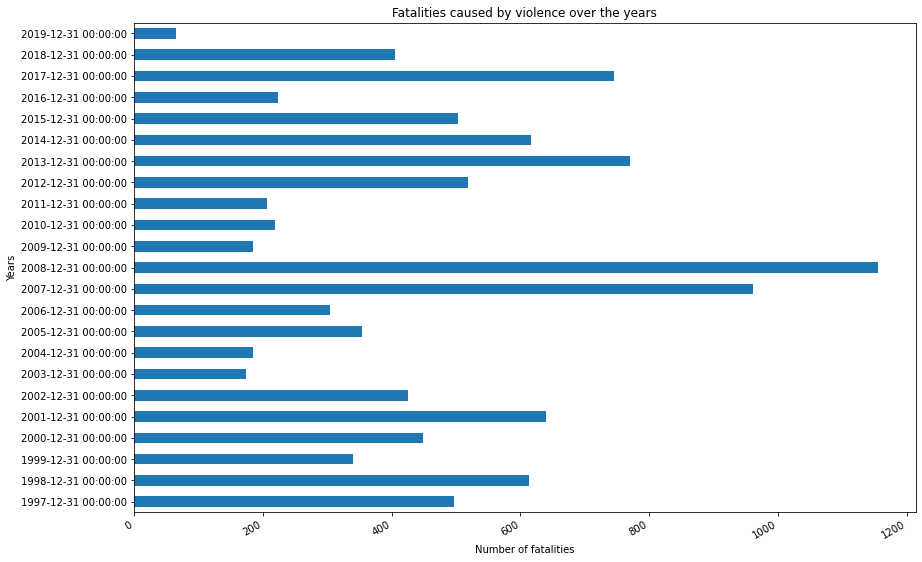

In [23]:
df['fatalities'].resample('Y').sum().plot(kind='barh',figsize=(14, 10) )
plt.title('Fatalities caused by violence over the years')
plt.ylabel('Years')
plt.xlabel('Number of fatalities')

<h2>Top 5 years with the most fatalities</h2>
<h3>Most of these years are either election years or the year
 before or after was an election year</h3>
 <h3> Lets dig deep to se what actually happened in these years</h3>

Text(0.5, 0, 'Number of fatalities')

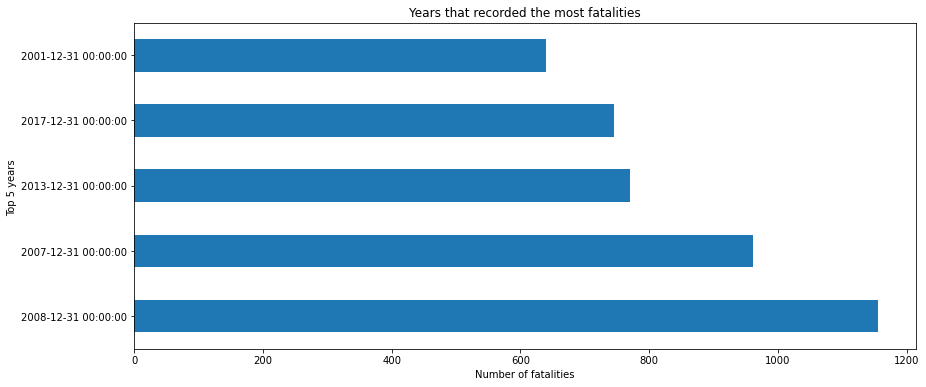

In [25]:
df['fatalities'].resample('Y').sum().sort_values(ascending=False)[:5].plot(kind='barh',figsize=(14, 6) )
plt.title('Years that recorded the most fatalities')
plt.ylabel('Top 5 years ')
plt.xlabel('Number of fatalities')

<h2>Participants involved with violence</h2>

In [11]:
df.groupby('actor1')['fatalities'].sum().sort_values(ascending=False)

actor1
Unidentified Armed Group (Kenya)                        1349
Al Shabaab                                               967
Rioters (Kenya)                                          963
Pokot Ethnic Militia (Kenya)                             797
Police Forces of Kenya (2002-2013)                       510
                                                        ... 
Police Forces of Kenya (2013-) Rapid Deployment Unit       0
Police Forces of Kenya (2013-) Prison Guards               0
Pirates (Somalia)                                          0
Pirates (Kenya)                                            0
Mumias Outgrowers Company Militia                          0
Name: fatalities, Length: 211, dtype: int64

Text(0.5, 0, 'Number of fatalities')

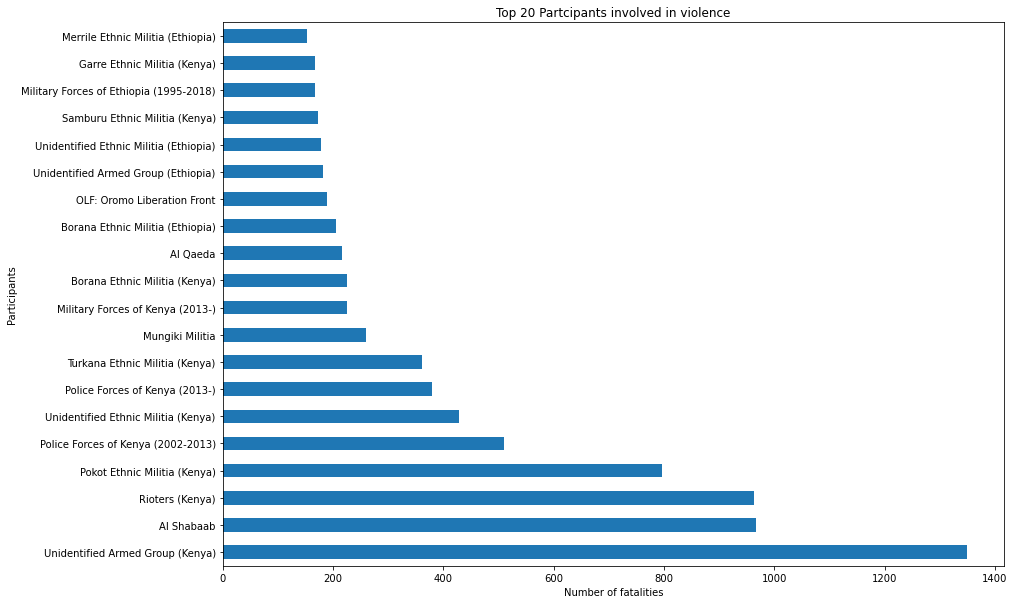

In [28]:
df.groupby('actor1')['fatalities'].sum().sort_values(ascending=False)[:20].plot(kind='barh', figsize=(14,10))
plt.title('Top 20 Partcipants involved in violence')
plt.ylabel('Participants')
plt.xlabel('Number of fatalities')

Kenya police forces seem to be hugely involved with the number of fatalities recorded in Kenya

Text(0, 0.5, '')

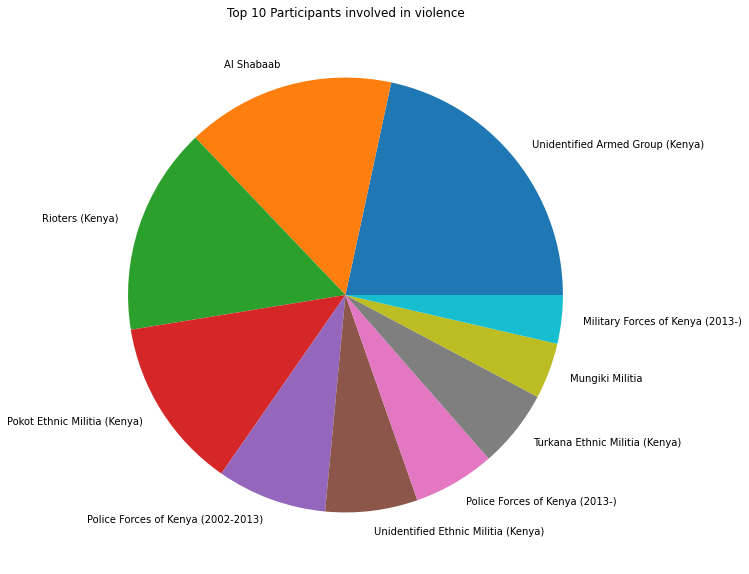

In [29]:
df.groupby('actor1')['fatalities'].sum().sort_values(ascending=False)[:10].plot(kind='pie', figsize=(14,10))
plt.title('Top 10 Participants involved in violence')
plt.ylabel('')